In [1]:
# Import libraries

from matplotlib.ticker import MultipleLocator, FixedLocator, LogLocator, NullFormatter, ScalarFormatter
from matplotlib.pyplot import MultipleLocator
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from datetime import date, datetime, time, timedelta
import os
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime, pytz
import re
import matplotlib.font_manager
import statsmodels.api as sm


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'libertine'

In [3]:
file_path = ""
slurm_data = pd.read_csv(file_path + "data_cleaned.csv", index_col = [0])
ml_data = pd.read_csv(file_path + "data_cleaned_ml.csv", index_col = [0])
generic_data = pd.read_csv(file_path + "data_cleaned_generic.csv", index_col = [0])
course_data = pd.read_csv(file_path + "data_cleaned_course.csv", index_col = [0])


In [42]:
# Divide jobs into: generic completed, generic failed, ml completed, ml failed, course completed, and course failed

ge_completed = generic_data[generic_data['State'] == 'COMPLETED']
ge_failed = generic_data[generic_data['State'] != 'COMPLETED']
ml_completed = ml_data[ml_data['State'] == 'COMPLETED']
ml_failed = ml_data[ml_data['State'] != 'COMPLETED']
cs_completed = course_data[course_data['State'] == 'COMPLETED']
cs_failed = course_data[course_data['State'] != 'COMPLETED']


## Failure Rates by User

39.9617113691234


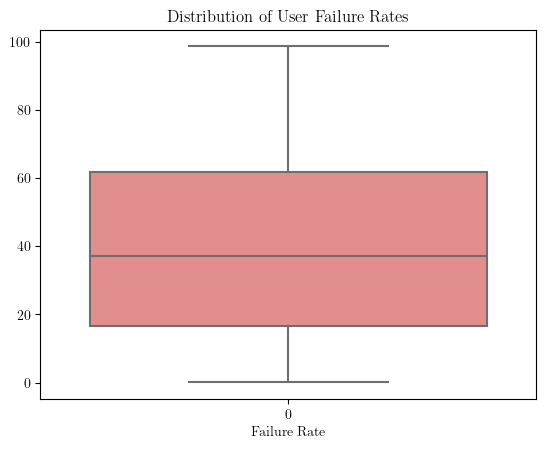

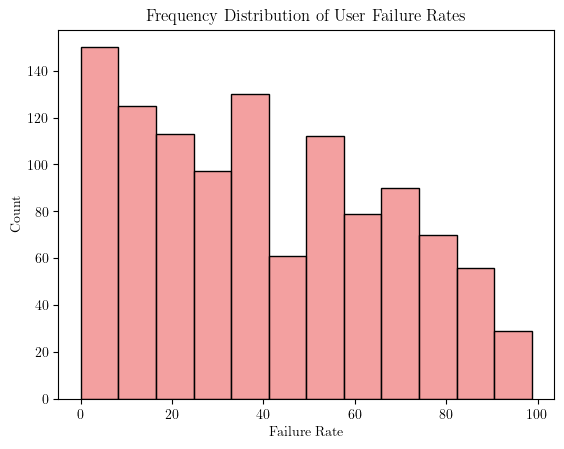

In [5]:
# Generic

# group the data by user and state
grouped = generic_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
failed_user_ge = pivot_table['FAILED']
all_user_ge = failed_user_ge + pivot_table['COMPLETED']
pivot_table['failure_rate'] = failed_user_ge / all_user_ge * 100

# handle potential division by zero
# pivot_table['failure_rate'] = pivot_table['failure_rate'].fillna(0)  # Fill NaNs with 0

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)

std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'], color='lightcoral')
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.savefig('fig-user-failure-rate-distribution-ge.pdf', bbox_inches = 'tight')
plt.show()

# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'], color='lightcoral')
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.savefig('fig-user-failure-rate-distribution-freq-ge.pdf', bbox_inches = 'tight')
plt.show()


48.0974261959406


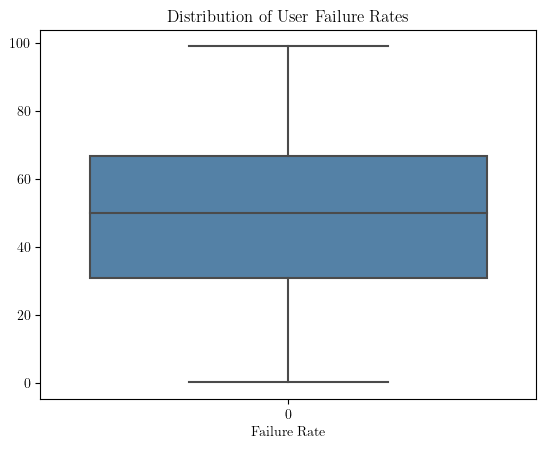

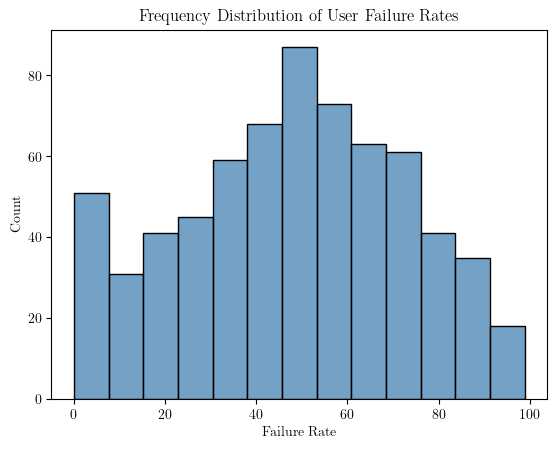

In [6]:
# ML

# group the data by user and state
grouped = ml_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
failed_user_ml = pivot_table['FAILED']
all_user_ml = failed_user_ml + pivot_table['COMPLETED']
pivot_table['failure_rate'] = failed_user_ml / all_user_ml * 100

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)
std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'], color='steelblue')
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.savefig('fig-user-failure-rate-distribution-ml.pdf', bbox_inches = 'tight')
plt.show()

# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'], color='steelblue')
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.savefig('fig-user-failure-rate-distribution-freq-ml.pdf', bbox_inches = 'tight')
plt.show()


55.749818276115064


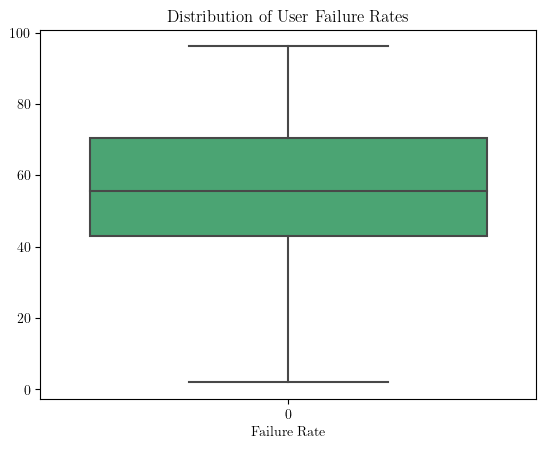

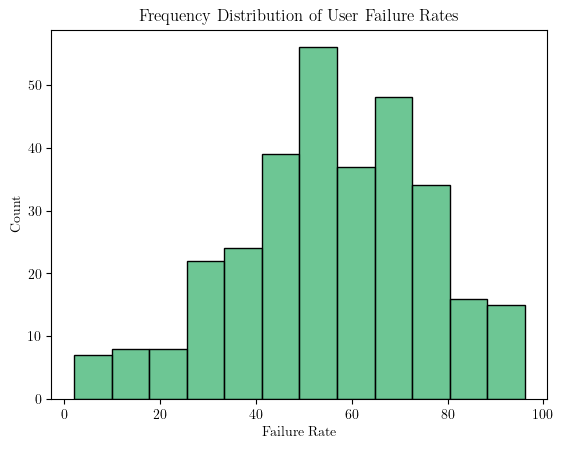

In [7]:
# Course

# group the data by user and state
grouped = course_data.groupby(['UID', 'State']).size().reset_index(name='count')

# pivot the data to create a table with user ids as rows, failed/completed as columns, and the count as values
pivot_table = grouped.pivot(index='UID', columns='State', values='count').reset_index()

# calculate the percentage of failed jobs for each user
failed_user_cs = pivot_table['FAILED']
all_user_cs = failed_user_cs + pivot_table['COMPLETED']
pivot_table['failure_rate'] = failed_user_cs / all_user_cs * 100

# calculate the mean and standard deviation of the failure rates
mean_failure_rate = pivot_table['failure_rate'].mean()
print(mean_failure_rate)
std_failure_rate = pivot_table['failure_rate'].std()

# create a box plot of the failure rates
sns.boxplot(data=pivot_table['failure_rate'], color='mediumseagreen')
plt.title('Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.savefig('fig-user-failure-rate-distribution-cs.pdf', bbox_inches = 'tight')
plt.show()

# create a histogram of the failure rates
sns.histplot(data=pivot_table['failure_rate'], color='mediumseagreen')
plt.title('Frequency Distribution of User Failure Rates')
plt.xlabel('Failure Rate')
plt.ylabel('Count')
plt.savefig('fig-user-failure-rate-distribution-freq-cs.pdf', bbox_inches = 'tight')
plt.show()


## Peak Analysis

In [8]:
df4 = slurm_data[slurm_data["State"] != "COMPLETED"]
df4 = df4[['Submit','node_type', 'running_time']]
df4['Submit'] = pd.to_datetime(df4['Submit'])
df4 = df4.sort_values(by = 'Submit')

ml_failure = df4[df4['node_type'] == 0]
ml_failure.drop('node_type', axis = 1, inplace = True)

ge_failure = df4[df4['node_type'] == 1]
ge_failure.drop('node_type', axis = 1, inplace = True)

all_failure = df4.drop('node_type', axis = 1)

/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/3842171403.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_failure.drop('node_type', axis = 1, inplace = True)
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/3842171403.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_failure.drop('node_type', axis = 1, inplace = True)


In [9]:
# Resample the data at 10 minutes intervals and count the number of job submissions

def change_granularity(failure):
    modified_timestamps = failure['Submit'].dt.floor(freq = '10min')
    modified_timestamps.name = None

    grouped_data = modified_timestamps.groupby(modified_timestamps).count().reset_index()
    grouped_data.columns = ['Submit', 'count']
    
    series = pd.Series(grouped_data['count'].values, index = grouped_data['Submit'])
    return series


In [10]:
job_submission_rate_all = change_granularity(all_failure)
threshold_all = job_submission_rate_all.mean() + job_submission_rate_all.std() * 0.01

print(job_submission_rate_all.mean())
print(job_submission_rate_all.std())
print(threshold_all)

job_submission_rate_ge = change_granularity(ge_failure)
job_submission_rate_ml = change_granularity(ml_failure)


18.016999341960958
425.7306896961632
22.27430623892259


In [11]:
# Identify peaks

def get_peak(job_submission_rate):
    peak_list = []
    current_peak_start = None
    for i in range(len(job_submission_rate)):
        if job_submission_rate[i] > threshold_all:
            if current_peak_start is None:
                current_peak_start = job_submission_rate.index[i]
        else:
            if current_peak_start is not None:
                peak_list.append(current_peak_start)
                current_peak_start = None
    if current_peak_start is not None:
        peak_list.append(current_peak_start)
    
    return peak_list

peak_ge = get_peak(job_submission_rate_ge)
peak_ml = get_peak(job_submission_rate_ml)


In [12]:
# Generic jobs
failure_10t_ge = ge_failure
failure_10t_ge['submit_min'] = failure_10t_ge['Submit'].dt.floor('30min')
peak_failure_10t_ge = failure_10t_ge.loc[failure_10t_ge['submit_min'].isin(peak_ge)]

# ML jobs
failure_10t_ml = ml_failure
failure_10t_ml['submit_min'] = failure_10t_ml['Submit'].dt.floor('30min')
peak_failure_10t_ml = failure_10t_ml.loc[failure_10t_ml['submit_min'].isin(peak_ml)]


/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/3133021736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_10t_ge['submit_min'] = failure_10t_ge['Submit'].dt.floor('30min')
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/3133021736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_10t_ml['submit_min'] = failure_10t_ml['Submit'].dt.floor('30min')


### Peak Duration

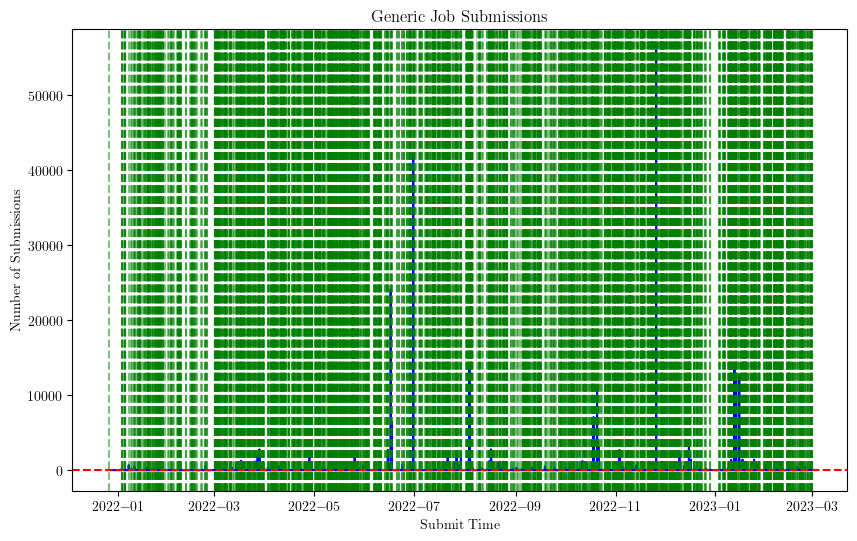

In [13]:
# Generic

# Create a line plot with threshold line
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(job_submission_rate_ge.index, job_submission_rate_ge.values, color='blue')
ax.axhline(y=threshold_all, color='red', linestyle='--')
for peak_start in peak_ge:
    ax.axvline(x=peak_start, color='green', linestyle='--', alpha=0.5)
ax.set_xlabel('Submit Time')
ax.set_ylabel('Number of Submissions')
ax.set_title('Generic Job Submissions')
plt.show()


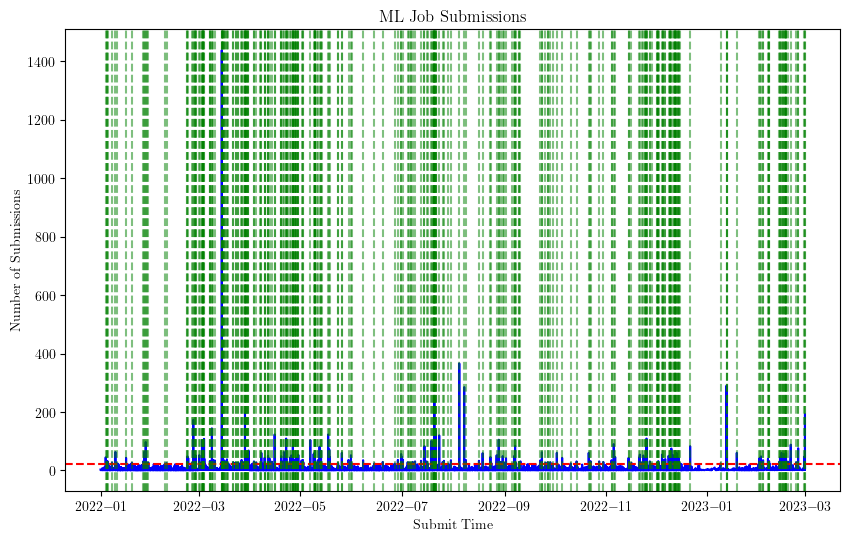

In [14]:
# ML

# Create a line plot with threshold line
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(job_submission_rate_ml.index, job_submission_rate_ml.values, color='blue')
ax.axhline(y=threshold_all, color='red', linestyle='--')
for peak_start in peak_ml:
    ax.axvline(x=peak_start, color='green', linestyle='--', alpha=0.5)
ax.set_xlabel('Submit Time')
ax.set_ylabel('Number of Submissions')
ax.set_title('ML Job Submissions')
plt.show()


In [26]:
def calc_mean_peak_duration(peak_list):
    # Initialize variables
    peak_durations = []
    current_period_start = peak_list[0]
    current_period_end = peak_list[0]

    # Iterate over the timestamps
    for i in range(1, len(peak_list)):
        diff = peak_list[i] - peak_list[i-1]
        if diff <= timedelta(minutes = 30):
            # Timestamp belongs to the current peak period
            current_period_end = peak_list[i]
        else:
            # Timestamp belongs to a new peak period
            period_duration = current_period_end - current_period_start + timedelta(minutes = 30)
            peak_durations.append(period_duration.total_seconds())
            current_period_start = peak_list[i]
            current_period_end = peak_list[i]
            
    # Calculate the mean value of peak periods in seconds
    mean_peak_duration = sum(peak_durations) / len(peak_durations)
      
    return mean_peak_duration

mean_peak_duration_ml = calc_mean_peak_duration(peak_ml)
print(f"Mean peak period duration of ML jobs is {mean_peak_duration_ml:.2f} seconds")

mean_peak_duration_ge = calc_mean_peak_duration(peak_ge)
print(f"Mean peak period duration of generic jobs is {mean_peak_duration_ge:.2f} seconds")


Mean peak period duration of ML jobsis 1897.58 seconds
Mean peak period duration of generic jobs is 2027.98 seconds


### Inter-Peak Time

In [16]:
# Create a list of peak periods

def extract_peak_periods(peak_list):
    peak_periods = []
    last_timestamp = None
    
    for timestamp in peak_list:
        if last_timestamp is None:
            # first timestamp is always a peak period
            peak_periods.append([timestamp])
        elif (timestamp - last_timestamp).seconds <= 1800: # 30 min
            # timestamps are less than or equal to 30 minutes apart, so they belong to the same peak period
            peak_periods[-1].append(timestamp)
        else:
            # timestamps are more than 30 minutes apart, so this timestamp belongs to its own peak period
            peak_periods.append([timestamp])
        last_timestamp = timestamp
        
    return peak_periods
        

In [17]:
peak_periods_ge = extract_peak_periods(peak_ge)
peak_periods_ml = extract_peak_periods(peak_ml)

In [18]:
# Calculate the mean of inter-peak time

def process_peak_periods(peak_periods):
    modified_list = []

    for item in peak_periods:
        if isinstance(item, list) and len(item) == 1:
            modified_list.extend([item[0], item[0]])
        elif isinstance(item, list) and len(item) > 1:
            modified_list.extend([item[0], item[-1]])
        else:
            modified_list.append(item)
            
    # Calculate the intervals between peaks
    intervals = []
    
    for i in range(2, len(modified_list), 2):
        interval = modified_list[i] - modified_list[i-1]
        intervals.append(interval.total_seconds())

    # Calculate the mean interval
    mean_interval = sum(intervals) / len(intervals)
    
    return mean_interval

In [19]:
mean_inter_peak_ge = process_peak_periods(peak_periods_ge)
mean_inter_peak_ml = process_peak_periods(peak_periods_ml)

print(f"Mean inter-peak time of ML jobs is {mean_inter_peak_ml:.2f} seconds")
print(f"Mean inter-peak time of generic jobs is {mean_inter_peak_ge:.2f} seconds")


Mean inter-peak time of ML jobs is 121227.86 seconds
Mean inter-peak time of generic jobs is 26565.66 seconds


### Inter-Arrival Time of Failures During Peaks 

In [20]:
def calc_iat_peak(df):
    timestamps = df['Submit']
    
    # Calculate time differences between adjacent timestamps
    time_diffs = timestamps.diff()

    # Identify periods based on time difference exceeding 30 minutes
    periods = (time_diffs > pd.Timedelta(minutes = 30)).cumsum()

    # Group timestamps by periods and extract individual periods
    result = timestamps.groupby(periods).apply(list)
    
    intervals = []
    num_intervals = 0

    for lst in result:
        for i in range(len(lst) - 1):
            interval = (lst[i+1] - lst[i]).total_seconds()
            intervals.append(interval)
            num_intervals += 1

    # Calculate mean interval
    mean_interval = sum(intervals) / num_intervals
    
    return mean_interval


In [21]:
mean_iat_peak_ge = calc_iat_peak(peak_failure_10t_ge)
mean_iat_peak_ml = calc_iat_peak(peak_failure_10t_ml)

print(f"Mean inter-arrival time of failed ML jobs during peaks is {mean_iat_peak_ml:.2f} seconds")
print(f"Mean inter-arrival time of failed generic jobs during peaks is {mean_iat_peak_ge:.2f} seconds")


Mean inter-arrival time of failed ML jobs during peaks is 18.47 seconds
Mean inter-arrival time of failed generic jobs during peaks is 5.56 seconds


### Mean Time Between Failures

In [22]:
def calc_mtbf(df):
    timestamps = df['Submit']
    
    # Calculate time differences between failures
    time_diffs = timestamps.diff()

    # Calculate mean time between failures
    mean_time_between_failures = time_diffs.mean().total_seconds()
    
    return mean_time_between_failures


In [23]:
mtbf_ge = calc_mtbf(ge_failure)
mtbf_ml = calc_mtbf(ml_failure)

print(f"Mean time between failures for ML jobs during peaks is {mtbf_ml:.2f} seconds")
print(f"Mean time between failures for generic jobs is {mtbf_ge:.2f} seconds")


Mean time between failures for ML jobs during peaks is 412.70 seconds
Mean time between failures for generic jobs is 69.17 seconds


In [24]:
slurm_data['Submit'] = pd.to_datetime(slurm_data['Submit'])
all_failure = slurm_data[slurm_data['State'] != 'COMPLETED']
mtbf_all = calc_mtbf(all_failure)
print(f"Mean time between failures for all jobs is {mtbf_all:.2f} seconds")


Mean time between failures for all jobs is 56.57 seconds


### Failure Duration During Peaks

In [28]:
def calc_avg_failure_duration(df):
    # Calculate the duration of each failure
    df['End'] = df['Submit'] + pd.to_timedelta(df['running_time'], unit='s')
    df['Duration'] = (df['End'] - df['Submit']).dt.total_seconds()

    # Calculate the average failure duration during peaks
    avg_failure_duration = df['Duration'].mean()
    
    return avg_failure_duration

avg_failure_duration_ge = calc_avg_failure_duration(peak_failure_10t_ge)
avg_failure_duration_ml = calc_avg_failure_duration(peak_failure_10t_ml)

print(f"Average failure duration for ML jobs during peaks is {avg_failure_duration_ml:.2f} seconds")
print(f"Average failure duration for generic jobs during peaks is {avg_failure_duration_ge:.2f} seconds")


Average failure duration for ML jobs during peaks is 7142.46 seconds
Average failure duration for generic jobs during peaks is 5302.35 seconds


/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/2365321178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End'] = df['Submit'] + pd.to_timedelta(df['running_time'], unit='s')
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/2365321178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = (df['End'] - df['Submit']).dt.total_seconds()
/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/2365321178.py:3: SettingWithCopyWarning: 
A value is tryin

## Mean Time Between Failures

In [29]:
def calc_mtbf(df):
    timestamps = df['Submit']
    
    # Calculate time differences between failures
    time_diffs = timestamps.diff()

    # Calculate mean time between failures
    mean_time_between_failures = time_diffs.mean().total_seconds()
    
    return mean_time_between_failures


In [52]:
cs_failure = cs_failed[['Submit','running_time']]
cs_failure['Submit'] = pd.to_datetime(cs_failure['Submit'])


/var/folders/_0/ckwc3nwj0cjbxyphnn5k3nl40000gp/T/ipykernel_3306/3308745665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_failure['Submit'] = pd.to_datetime(cs_failure['Submit'])


In [54]:
mtbf_ge = calc_mtbf(ge_failure)
mtbf_ml = calc_mtbf(ml_failure)
mtbf_cs = calc_mtbf(cs_failure)

print(f"Mean time between failures for generic jobs is {mtbf_ge:.2f} seconds")
print(f"Mean time between failures for ML jobs during peaks is {mtbf_ml:.2f} seconds")
print(f"Mean time between failures for Course-related jobs during peaks is {mtbf_cs:.2f} seconds")


Mean time between failures for generic jobs is 69.17 seconds
Mean time between failures for ML jobs during peaks is 412.70 seconds
Mean time between failures for Course-related jobs during peaks is 905.15 seconds
